In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://hackanons.com/2020/12/python-extract-data-from-json-file.html
with open("json_files/heart_rate-2021-08-31.json") as f:
    json_data = json.load(f)

In [3]:
# https://www.geeksforgeeks.org/python-accessing-key-value-in-dictionary/
print ("Dict keys 1 are : ")
dict_keys1 = [k for k in json_data[0]]
print(dict_keys1)

values1 = [json_data[0][k] for k in json_data[0]]
print ("Dict keys 2 are : ")
dict_keys2 = [k for k in values1[1]]
print(dict_keys2)

print ("Values are : ")
values2 = [values1[1][k] for k in values1[1]]
print(values2)

# And then we are interested in values2[0]

heart_rate = np.zeros(len(json_data))

for i in range(len(json_data)):
    values1 = [json_data[i][k] for k in json_data[i]]
    values2 = [values1[1][k] for k in values1[1]]
    heart_rate[i] = values2[0]

Dict keys 1 are : 
['dateTime', 'value']
Dict keys 2 are : 
['bpm', 'confidence']
Values are : 
[61, 3]


In [13]:
json_data

[{'dateTime': '08/31/21 05:00:03', 'value': {'bpm': 61, 'confidence': 3}},
 {'dateTime': '08/31/21 05:00:08', 'value': {'bpm': 60, 'confidence': 3}},
 {'dateTime': '08/31/21 05:00:23', 'value': {'bpm': 59, 'confidence': 3}},
 {'dateTime': '08/31/21 05:00:28', 'value': {'bpm': 60, 'confidence': 3}},
 {'dateTime': '08/31/21 05:00:43', 'value': {'bpm': 60, 'confidence': 3}},
 {'dateTime': '08/31/21 05:00:58', 'value': {'bpm': 59, 'confidence': 3}},
 {'dateTime': '08/31/21 05:01:03', 'value': {'bpm': 60, 'confidence': 3}},
 {'dateTime': '08/31/21 05:01:13', 'value': {'bpm': 59, 'confidence': 3}},
 {'dateTime': '08/31/21 05:01:28', 'value': {'bpm': 60, 'confidence': 3}},
 {'dateTime': '08/31/21 05:01:33', 'value': {'bpm': 59, 'confidence': 3}},
 {'dateTime': '08/31/21 05:01:38', 'value': {'bpm': 60, 'confidence': 3}},
 {'dateTime': '08/31/21 05:01:43', 'value': {'bpm': 61, 'confidence': 3}},
 {'dateTime': '08/31/21 05:01:53', 'value': {'bpm': 60, 'confidence': 3}},
 {'dateTime': '08/31/21 0

In [4]:
def extract_hr(file_name):
    with open(file_name) as f:
        json_data = json.load(f)
    
    heart_rate = np.zeros(len(json_data))

    for i in range(len(json_data)):
        values1 = [json_data[i][k] for k in json_data[i]]
        values2 = [values1[1][k] for k in values1[1]]
        heart_rate[i] = values2[0]
        
    return heart_rate

In [5]:
heart_rate_31_8 = extract_hr("json_files/heart_rate-2021-08-31.json")
heart_rate_01_9 = extract_hr("json_files/heart_rate-2021-09-01.json")
heart_rate_02_9 = extract_hr("json_files/heart_rate-2021-09-02.json")

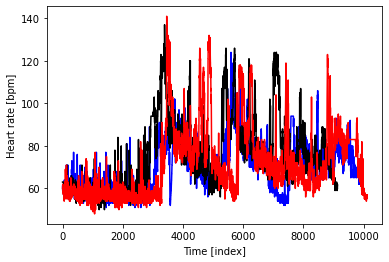

In [6]:
plt.plot(heart_rate_31_8, c="b")
plt.plot(heart_rate_01_9, c="k")
plt.plot(heart_rate_02_9, c="r")
plt.xlabel("Time [index]")
plt.ylabel("Heart rate [bpm]")
plt.show()

# Simple idea. Divide data in ~5s time bins, obtain average of heart rate and standard deviation. Plot this in a 2D plot. Use K-means to classify.

In [8]:
len(heart_rate_31_8)

9880

In [ ]:
hr_5s = []
sd_5s = []

In [16]:
dict_keys1[0]

'dateTime'

In [65]:
# O challenge, extract time array from json

times = [json_data[k]['dateTime'] for k in range(len(json_data))]

times[0] #list

'08/31/21 05:00:03'

In [66]:
# https://stackoverflow.com/questions/4697006/python-split-string-by-list-of-separators
def split(txt, seps):
    default_sep = seps[0]

    # we skip seps[0] because that's the default separator
    for sep in seps[1:]:
        txt = txt.replace(sep, default_sep)
    return [i.strip() for i in txt.split(default_sep)]

In [71]:
only_time = [split(times[k], ' ')[1] for k in range(len(times))]

only_time

['05:00:03',
 '05:00:08',
 '05:00:23',
 '05:00:28',
 '05:00:43',
 '05:00:58',
 '05:01:03',
 '05:01:13',
 '05:01:28',
 '05:01:33',
 '05:01:38',
 '05:01:43',
 '05:01:53',
 '05:02:08',
 '05:02:23',
 '05:02:38',
 '05:02:48',
 '05:03:03',
 '05:03:18',
 '05:03:20',
 '05:03:35',
 '05:03:40',
 '05:03:50',
 '05:04:05',
 '05:04:15',
 '05:04:30',
 '05:04:45',
 '05:04:50',
 '05:05:05',
 '05:05:20',
 '05:05:35',
 '05:05:40',
 '05:05:55',
 '05:06:00',
 '05:06:05',
 '05:06:10',
 '05:06:15',
 '05:06:25',
 '05:06:30',
 '05:06:40',
 '05:06:50',
 '05:07:00',
 '05:07:15',
 '05:07:20',
 '05:07:35',
 '05:07:45',
 '05:07:52',
 '05:08:02',
 '05:08:17',
 '05:08:22',
 '05:08:37',
 '05:08:42',
 '05:08:47',
 '05:08:57',
 '05:09:12',
 '05:09:27',
 '05:09:32',
 '05:09:37',
 '05:09:42',
 '05:09:47',
 '05:09:52',
 '05:10:07',
 '05:10:12',
 '05:10:22',
 '05:10:32',
 '05:10:37',
 '05:10:42',
 '05:10:57',
 '05:11:12',
 '05:11:17',
 '05:11:32',
 '05:11:47',
 '05:11:52',
 '05:11:59',
 '05:12:09',
 '05:12:14',
 '05:12:24',

In [79]:
hms = [split(only_time[k], ":") for k in range(len(times))] #hour minute second

# The index will represent the second of the day. Total of 86 400 seconds in one day

# Converting the time to the number of second of the day
indices = [int(hms[k][0])*3600 + int(hms[k][1])*60 + int(hms[k][2]) for k in range(len(hms))]

print(indices)

[18003, 18008, 18023, 18028, 18043, 18058, 18063, 18073, 18088, 18093, 18098, 18103, 18113, 18128, 18143, 18158, 18168, 18183, 18198, 18200, 18215, 18220, 18230, 18245, 18255, 18270, 18285, 18290, 18305, 18320, 18335, 18340, 18355, 18360, 18365, 18370, 18375, 18385, 18390, 18400, 18410, 18420, 18435, 18440, 18455, 18465, 18472, 18482, 18497, 18502, 18517, 18522, 18527, 18537, 18552, 18567, 18572, 18577, 18582, 18587, 18592, 18607, 18612, 18622, 18632, 18637, 18642, 18657, 18672, 18677, 18692, 18707, 18712, 18719, 18729, 18734, 18744, 18759, 18764, 18779, 18794, 18799, 18804, 18809, 18824, 18839, 18854, 18859, 18864, 18879, 18884, 18894, 18909, 18914, 18924, 18934, 18944, 18959, 18964, 18979, 18981, 18991, 18996, 19011, 19021, 19026, 19041, 19051, 19066, 19076, 19086, 19101, 19116, 19126, 19141, 19146, 19156, 19161, 19176, 19191, 19206, 19211, 19216, 19231, 19236, 19246, 19256, 19264, 19269, 19274, 19279, 19284, 19289, 19294, 19299, 19309, 19314, 19319, 19324, 19329, 19334, 19339, 19344

In [81]:
# First challenge, divide everything in 5min time bins, that is in 300 s time bins!
5*60

300

300